# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('ggplot')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [40]:
# Load the dataset
df = pd.read_csv('./data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [42]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [46]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
# df['Year'] = pd.to_datetime(df['Year']).dt.year
df = df.groupby('Year').mean().reset_index()
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

In [48]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns  

# Display descriptive statistics
print(df.describe())

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))


              Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count   124.000000                       124.000000               124.000000   
mean   1961.500000                        14.499538               350.028626   
std      35.939764                         0.009960                 0.456535   
min    1900.000000                        14.474559               348.642249   
25%    1930.750000                        14.492782               349.691692   
50%    1961.500000                        14.499496               350.022334   
75%    1992.250000                        14.504872               350.367023   
max    2023.000000                        14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min             148.051748             

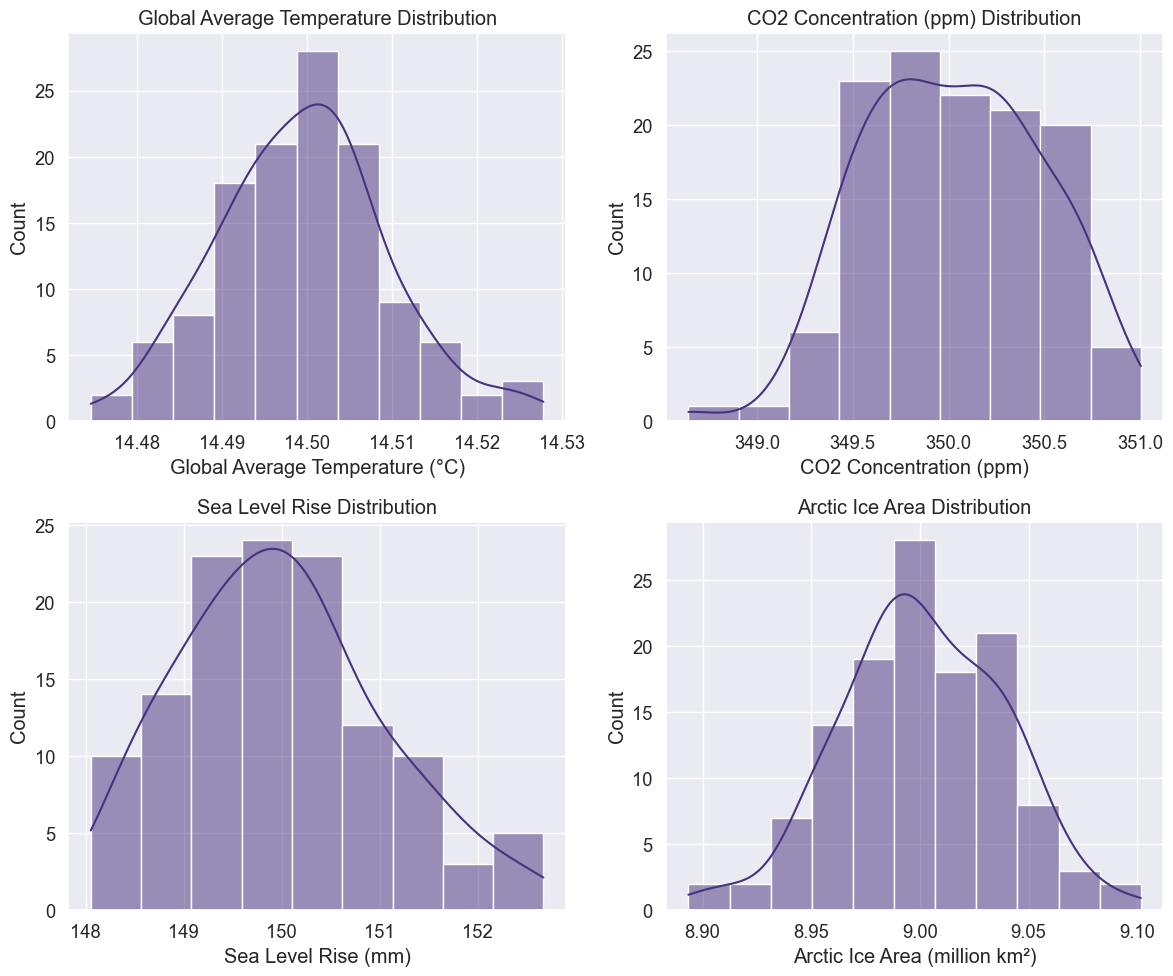

In [110]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid for histograms

# Histogram for Global Average Temperature
sns.histplot(df['Global Average Temperature (°C)'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title("Global Average Temperature Distribution")

# histogram for CO2 Concentration (ppm)
sns.histplot(df['CO2 Concentration (ppm)'], ax=axes[0, 1], kde=True)  # Adjust ax index as needed
axes[0, 1].set_title("CO2 Concentration (ppm) Distribution")

# Histogram for Sea Level Rise (mm)
sns.histplot(df['Sea Level Rise (mm)'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title("Sea Level Rise Distribution")

# Histogram for Arctic Ice Area (million km²)
sns.histplot(df['Arctic Ice Area (million km²)'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title("Arctic Ice Area Distribution")

# Show the plots
plt.tight_layout()
plt.show()


              Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count   124.000000                       124.000000               124.000000   
mean   1961.500000                        14.499538               350.028626   
std      35.939764                         0.009960                 0.456535   
min    1900.000000                        14.474559               348.642249   
25%    1930.750000                        14.492782               349.691692   
50%    1961.500000                        14.499496               350.022334   
75%    1992.250000                        14.504872               350.367023   
max    2023.000000                        14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min             148.051748             

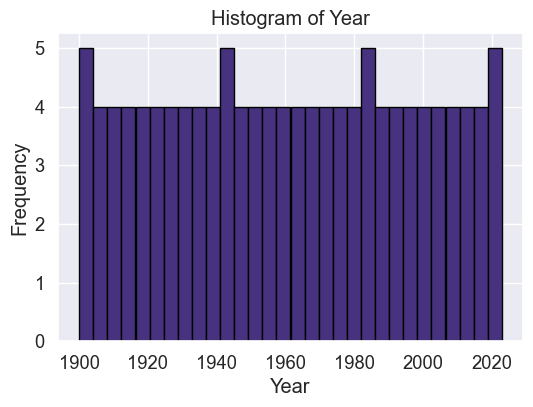

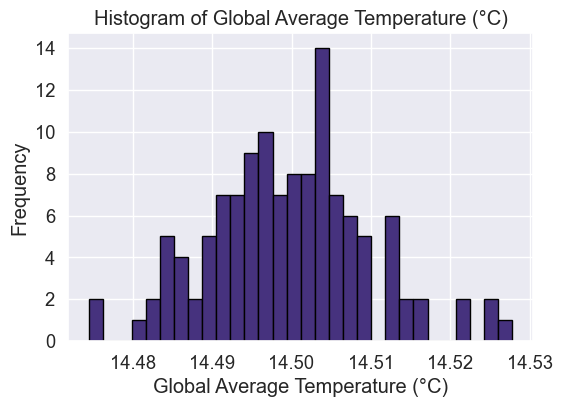

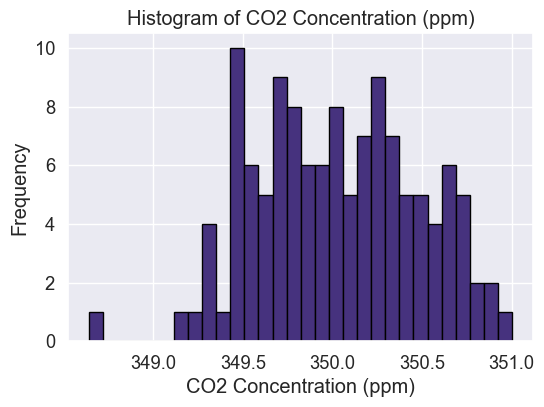

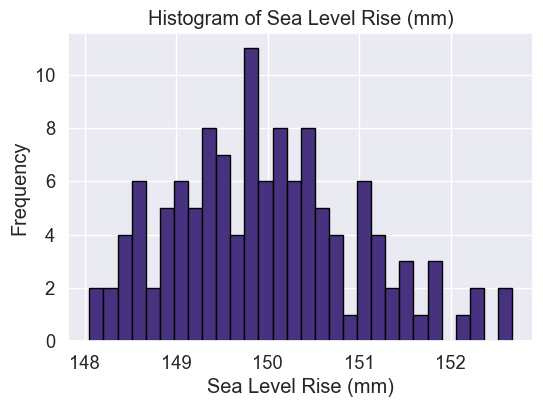

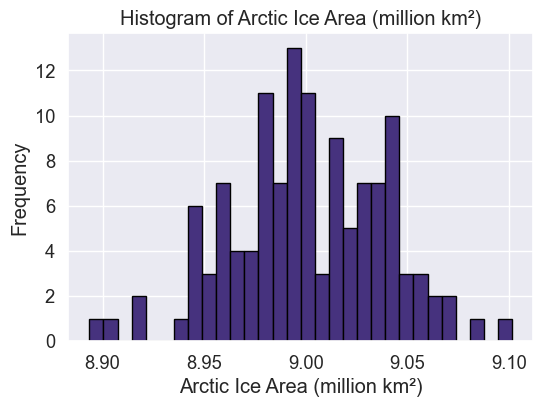

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

#  histograms
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


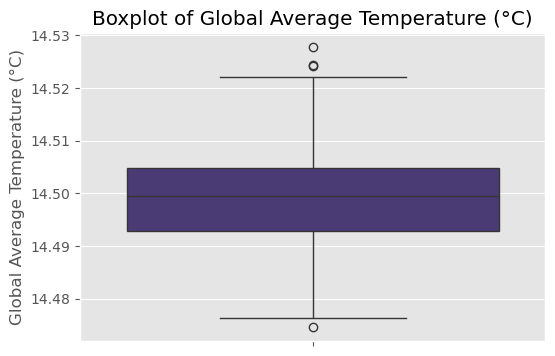

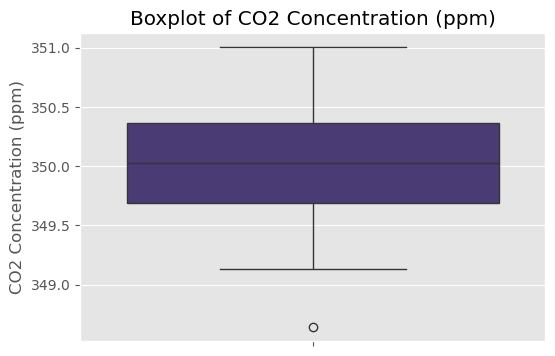

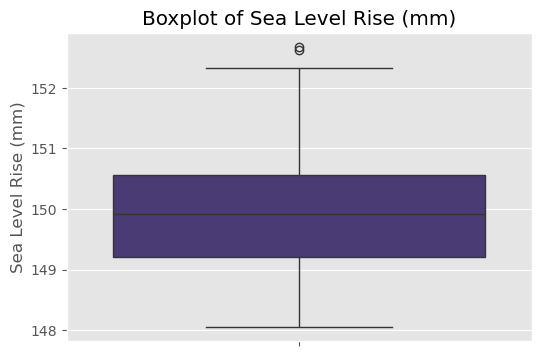

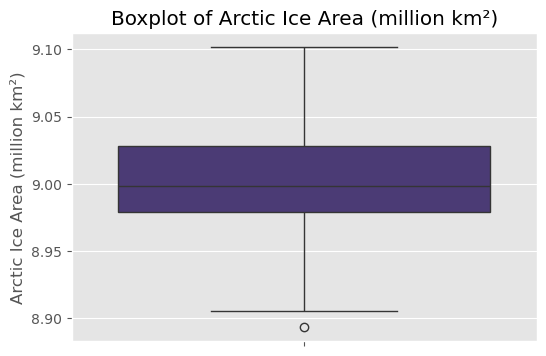

In [11]:
#  boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

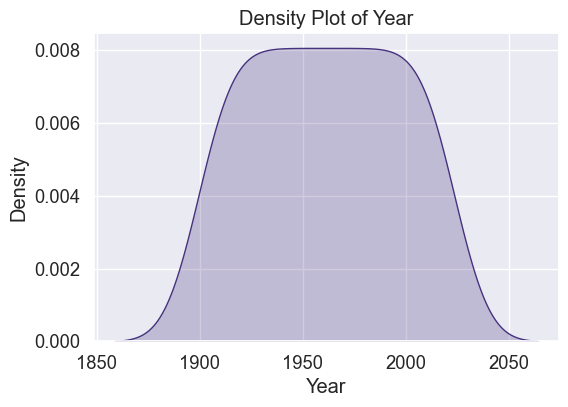

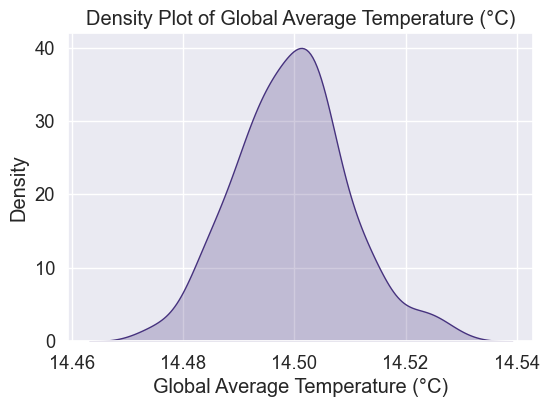

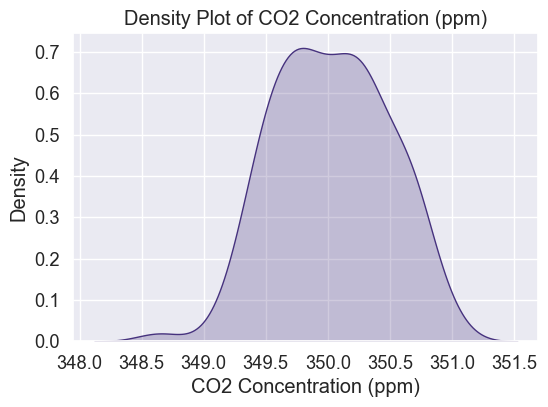

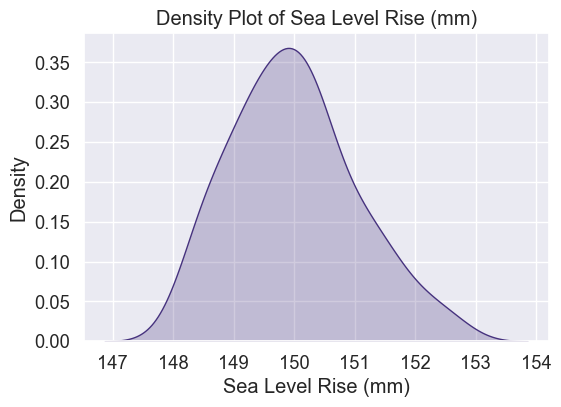

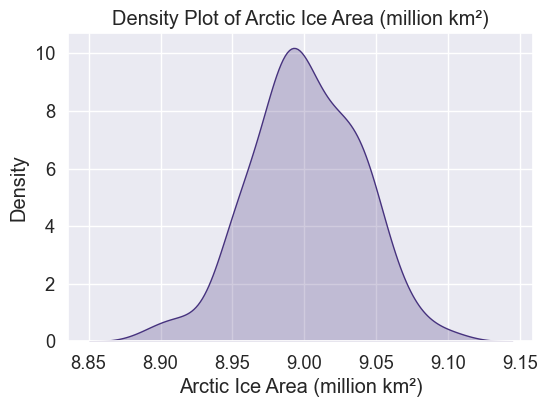

In [54]:
# KDE plots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"Density Plot of {col}")
    plt.xlabel(col)
    plt.show()


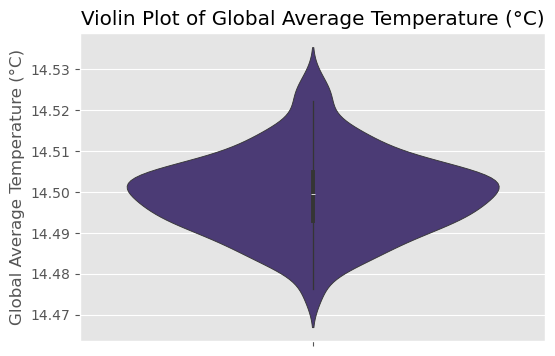

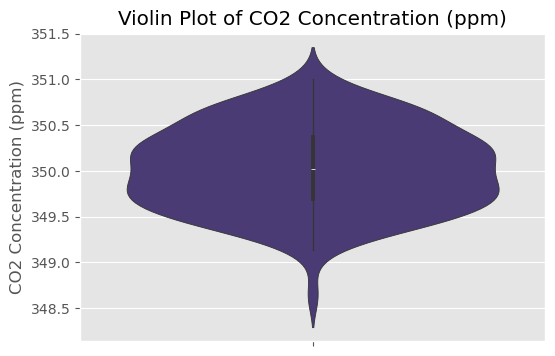

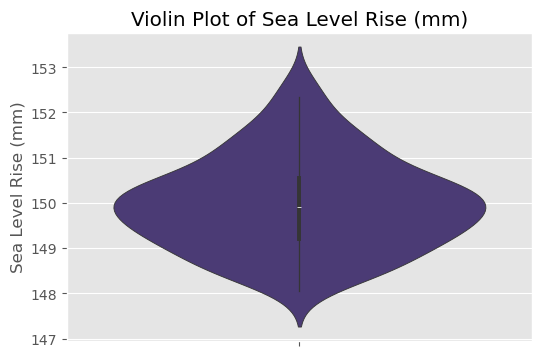

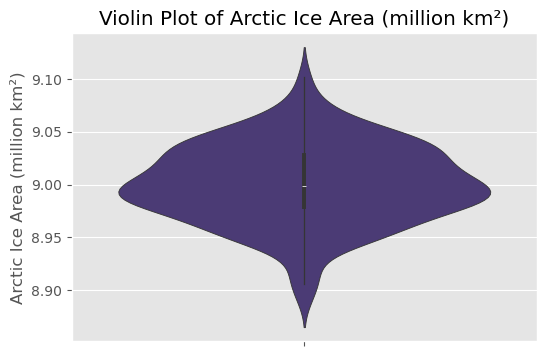

In [13]:
# violin plots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(y=df[col])
    plt.title(f"Violin Plot of {col}")
    plt.ylabel(col)
    plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

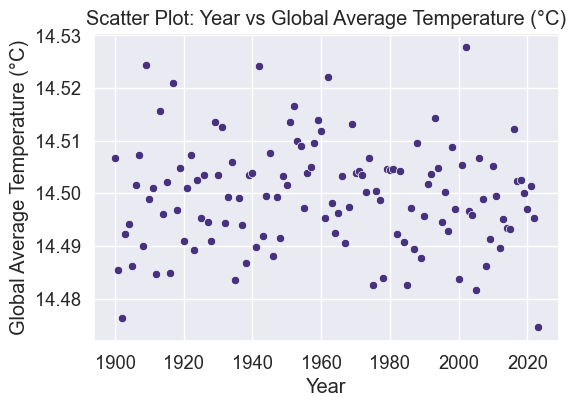

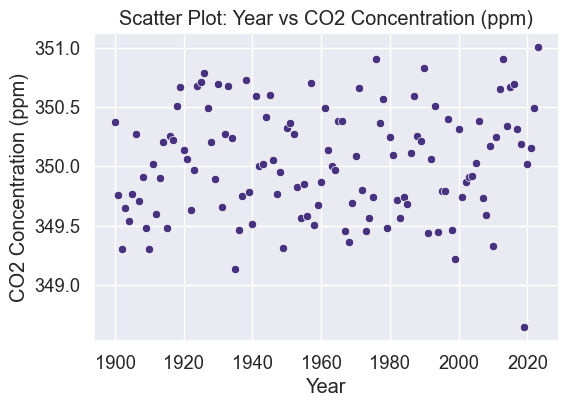

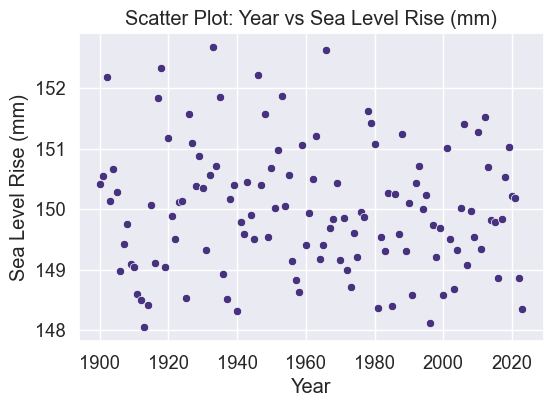

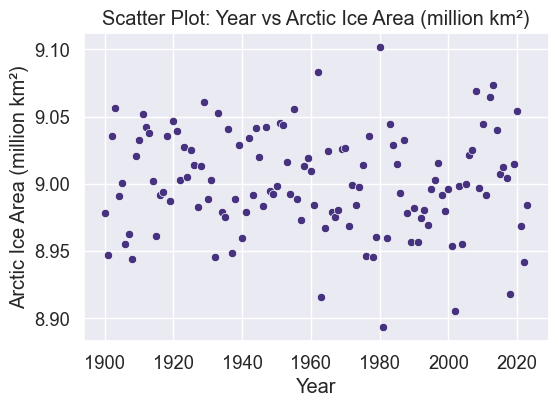

In [56]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#scatter plots
for col in numeric_cols:
    if col != "Year":  # Assuming "Year" is a column but not used as a dependent variable
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df["Year"], y=df[col])
        plt.title(f"Scatter Plot: Year vs {col}")
        plt.xlabel("Year")
        plt.ylabel(col)
        plt.show()

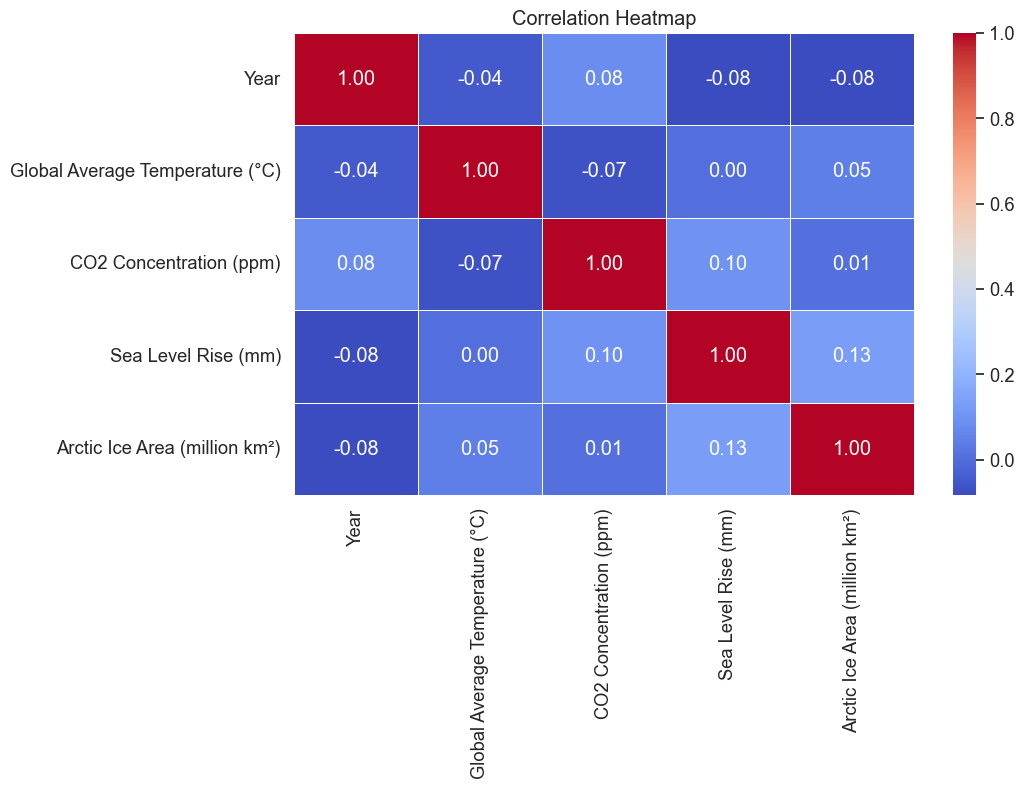

In [58]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

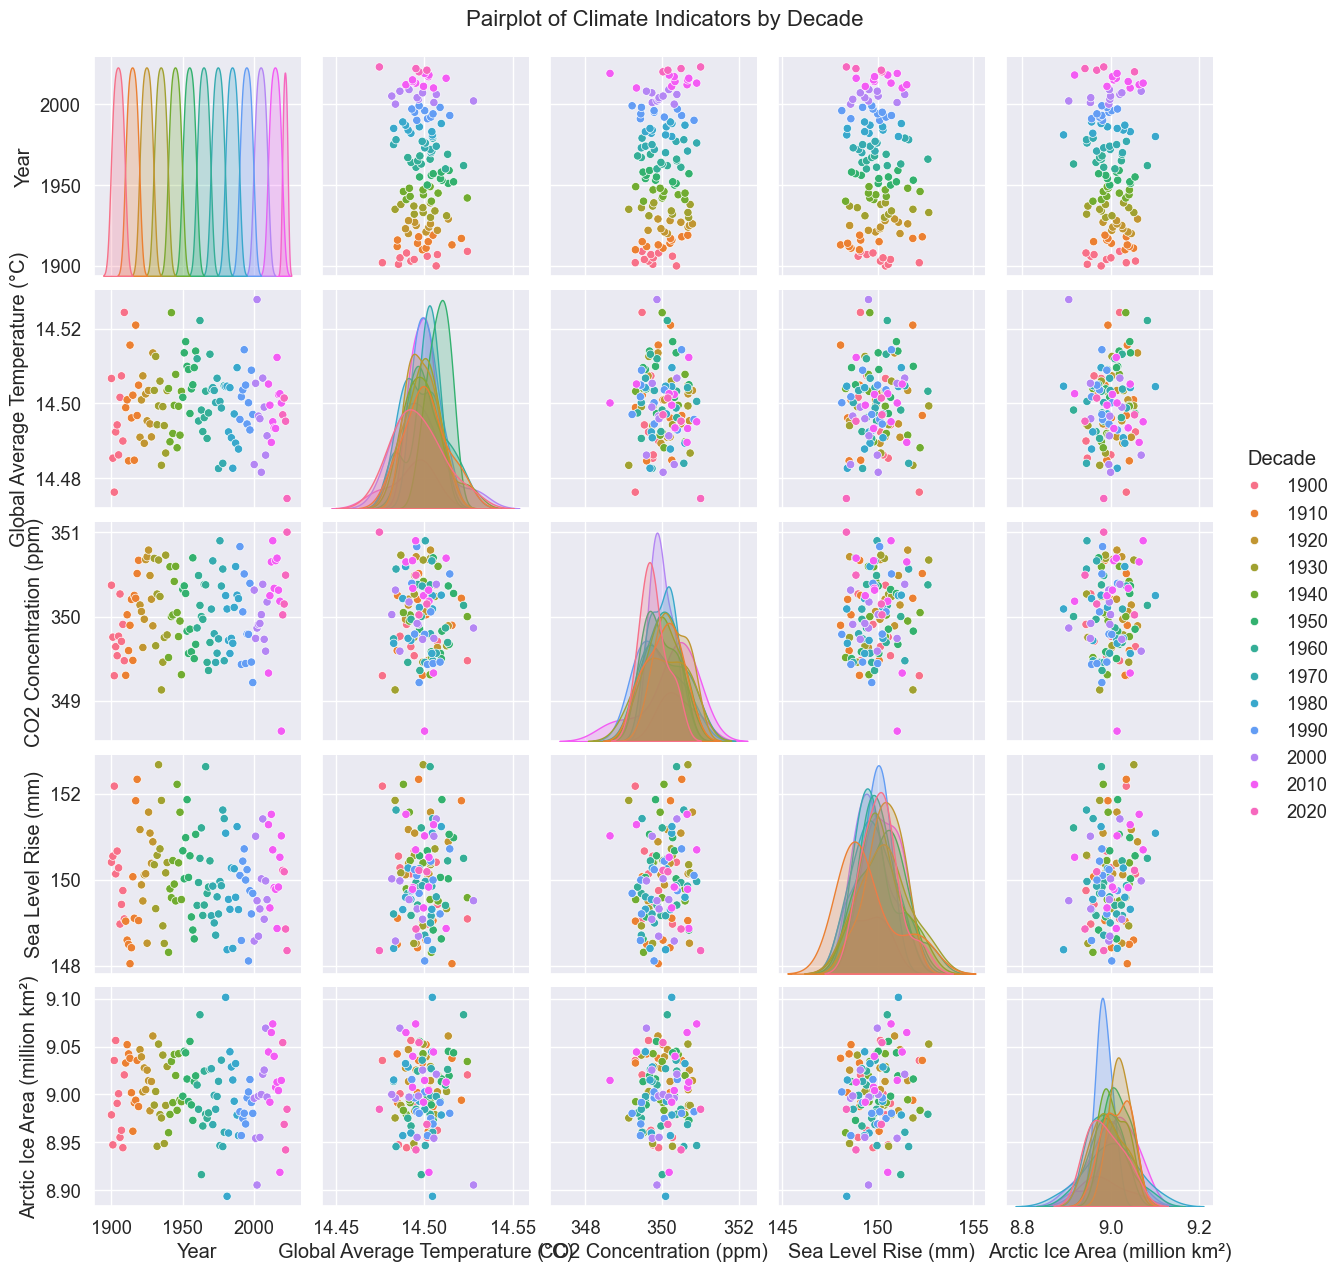

In [90]:
# # TODO: Perform multivariate analysis
# # Create advanced visualizations showing multiple variables
# # Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Convert "Year" to integer type if it is not already
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Converts 'Year' to numeric, force errors to NaN

# Create a new 'Decade' column based on the 'Year' column
df['Decade'] = (df['Year'] // 10) * 10  # Convert Year to the decade 

# Convert the 'Decade' column to a categorical type - opt
df['Decade'] = pd.Categorical(df['Decade'])

# Handle missing values if necessary
df = df.dropna()

# Create the pairplot with 'Decade' as hue
pairplot = sns.pairplot(df, 
                         hue="Decade",  # Color by Decade
                         diag_kind="kde")  # Smooth density on diagonals

# Adjust the title
pairplot.fig.suptitle("Pairplot of Climate Indicators by Decade", y=1.02, fontsize=16)
plt.show()


In [100]:
print(df[['Year', 'CO2 Concentration (ppm)']].head())  # Just to check the data


   Year  CO2 Concentration (ppm)
0  1900               350.373405
1  1901               349.757140
2  1902               349.299686
3  1903               349.644375
4  1904               349.537032


## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here